In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly import graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode


%matplotlib inline
pd.options.display.float_format = "{:,.3f}".format
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
cf.set_config_file(theme="pearl")

# Dataset information

## source:
https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

The dataset is about bankruptcy prediction of Polish companies.The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
## Attribute Information:
- X1: net profit / total assets
- X2: total liabilities / total assets
- X3: working capital / total assets
- X4: current assets / short-term liabilities
- X5: [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- X6: retained earnings / total assets
- X7: EBIT / total assets
- X8: book value of equity / total liabilities
- X9: sales / total assets
- X10:  equity / total assets
- X11:  (gross profit + extraordinary items + financial expenses) / total assets
- X12:  gross profit / short-term liabilities
- X13:  (gross profit + depreciation) / sales
- X14:  (gross profit + interest) / total assets
- X15:  (total liabilities * 365) / (gross profit + depreciation)
- X16:  (gross profit + depreciation) / total liabilities
- X17:  total assets / total liabilities
- X18:  gross profit / total assets
- X19:  gross profit / sales
- X20:  (inventory * 365) / sales
- X21:  sales (n) / sales (n-1)
- X22:  profit on operating activities / total assets
- X23:  net profit / sales
- X24:  gross profit (in 3 years) / total assets
- X25:  (equity - share capital) / total assets
- X26:  (net profit + depreciation) / total liabilities
- X27:  profit on operating activities / financial expenses
- X28:  working capital / fixed assets
- X29:  logarithm of total assets
- X30:  (total liabilities - cash) / sales
- X31:  (gross profit + interest) / sales
- X32:  (current liabilities * 365) / cost of products sold
- X33:  operating expenses / short-term liabilities
- X34:  operating expenses / total liabilities
- X35:  profit on sales / total assets
- X36:  total sales / total assets
- X37:  (current assets - inventories) / long-term liabilities
- X38:  constant capital / total assets
- X39:  profit on sales / sales
- X40:  (current assets - inventory - receivables) / short-term liabilities
- X41:  total liabilities / ((profit on operating activities + depreciation) * (12/365))
- X42:  profit on operating activities / sales
- X43:  rotation receivables + inventory turnover in days
- X44:  (receivables * 365) / sales
- X45:  net profit / inventory
- X46:  (current assets - inventory) / short-term liabilities
- X47: (inventory * 365) / cost of products sold
- X48: EBITDA (profit on operating activities - depreciation) / total assets
- X49: EBITDA (profit on operating activities - depreciation) / sales
- X50: current assets / total liabilities
- X51: short-term liabilities / total assets
- X52: (short-term liabilities * 365) / cost of products sold)
- X53: equity / fixed assets
- X54: constant capital / fixed assets
- X55: working capital
- X56: (sales - cost of products sold) / sales
- X57: (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- X58: total costs /total sales
- X59: long-term liabilities / equity
- X60: sales / inventory
- X61: sales / receivables
- X62: (short-term liabilities *365) / sales
- X63: sales / short-term liabilities
- X64: sales / fixed assets
# Loading dataset

In [2]:
data = pd.read_csv('data/1year.arff', skiprows=69, names = ["X"+str(i) for i in range(1, 66)])
print(data.shape)
data.head()

(7027, 65)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.122,0.39718,0.878,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121,0.42002,0.853,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241,0.81774,0.766,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054,0.14207,0.946,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.135,0.48431,0.865,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


## Dataset description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      7027 non-null   object 
 1   X2      7027 non-null   object 
 2   X3      7027 non-null   object 
 3   X4      7027 non-null   object 
 4   X5      7027 non-null   object 
 5   X6      7027 non-null   object 
 6   X7      7027 non-null   object 
 7   X8      7027 non-null   object 
 8   X9      7027 non-null   object 
 9   X10     7027 non-null   object 
 10  X11     7027 non-null   object 
 11  X12     7027 non-null   object 
 12  X13     7027 non-null   float64
 13  X14     7027 non-null   object 
 14  X15     7027 non-null   object 
 15  X16     7027 non-null   object 
 16  X17     7027 non-null   object 
 17  X18     7027 non-null   object 
 18  X19     7027 non-null   float64
 19  X20     7027 non-null   float64
 20  X21     7027 non-null   object 
 21  X22     7027 non-null   object 
 22  

In [4]:
data.replace("?", "NaN",inplace=True)
data = data.applymap(lambda x: np.float(x))

## Dataset statistic

In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65
count,"7,024.000","7,024.000","7,024.000","6,997.000","7,019.000","7,024.000","7,024.000","7,002.000","7,026.000","7,024.000",...,"7,027.000","7,026.000","7,027.000","7,026.000","6,892.000","7,005.000","7,027.000","6,997.000","6,993.000","7,027.000"
mean,0.035,0.560,0.120,2.629,-263.167,0.060,0.314,2.624,5.553,1.826,...,-157.737,0.193,158.741,0.278,432.883,15.642,"4,763.202",8.127,208.732,0.039
std,4.566,5.350,5.275,13.257,"37,074.596",6.051,8.353,18.708,101.995,33.836,...,"13,221.248",4.344,"13,221.236",6.339,"26,128.019",261.555,"310,783.484",19.996,"5,140.709",0.193
min,-256.890,-72.162,-440.500,0.000,"-2,722,100.000",-397.890,-189.560,-141.410,0.000,-440.550,...,"-1,108,300.000",-315.370,-0.004,-327.970,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.021,0.297,0.027,1.063,-44.498,0.000,0.028,0.446,1.037,0.301,...,0.020,0.057,0.865,0.000,5.924,4.829,43.222,3.425,2.539,0.000
50%,0.076,0.483,0.181,1.502,-5.374,0.000,0.090,1.015,1.206,0.492,...,0.063,0.176,0.939,0.028,10.041,7.034,68.509,5.303,4.638,0.000
75%,0.160,0.680,0.363,2.461,37.770,0.147,0.189,2.268,2.133,0.676,...,0.138,0.352,0.982,0.274,20.139,10.703,106.335,8.358,9.782,0.000
max,94.280,441.500,1.000,"1,017.800","990,900.000",303.670,453.770,"1,452.200","3,876.100","1,099.500",...,1.000,126.670,"1,108,300.000",119.580,"2,137,800.000","21,110.000","25,016,000.000","1,042.200","294,770.000",1.000


# Analyzing
## Number of bankrupt company

In [6]:
c = data.groupby("X65").count().X1.rename({0:"not bankrupt", 1:'bankrupted'})
c.iplot(kind='bar', title="Number of bankrupted & not bankrupted company",
                                  xTitle="status", yTitle="number of company")

## Min&Max for each ratio

In [7]:
data.agg([np.min,np.max]).T.iplot(kind='bar',title="Min/Max for each ration",
                                  xTitle="ratio", yTitle="value")

since the data is not cleaned, there are still outliers or unreasonable values which make the analyzing bias. We can see here, for some ratio, their maximum or minimum is overwhelmingly big in size as showing in the chart.

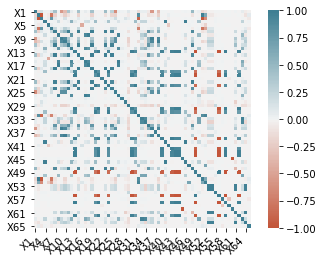

In [11]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Analyzing for each group
We will focus only on 4 ratio groups which contains attributes:
- liquidity: has X4, X40, and X46 which are current ratio, quick ratio, and cash ratio.
- leverage: has X2, X59 which are debt ratio, and long-term debt/equity.
- efficiency: has X9, X47 which are Asset turnover ratio,  and Days sales in inventory ratio.
- profitability: X1, X19, X42 which are ROA, gross margin ratio, and operating margin ratio.

Finally, we includes X65 column which represents the status of companies if they will be bankrupted or not.

In [8]:
df = data[["X4", "X40", "X46",'X2','X59','X9', 'X47',"X1","X19","X42",'X65']]
new_col_name = {"X4":"current ratio", "X46":"quick ratio", "X40": "cash ratio", 
                 "X2": "debt ratio", "X59": "LT-debt/equity",
                 "X9":"Asset turnover ratio", "X47": "Days sales in inventory ratio", 
                 "X1": "ROA", "X19": "gross margin ratio", "X42":"operating margin ratio",
               "X65": "status"}
df.rename(new_col_name, axis=1, inplace=True)

In [9]:
df.head()

,current ratio,cash ratio,quick ratio,debt ratio,LT-debt/equity,Asset turnover ratio,Days sales in inventory ratio,ROA,gross margin ratio,operating margin ratio,status
0,2.047,0.663,1.522,0.380,0.002,1.139,49.394,0.201,0.149,0.128,0.000
1,1.945,0.086,1.125,0.500,0.000,1.700,100.130,0.209,0.152,0.146,0.000
2,1.555,0.322,1.010,0.696,0.695,1.309,96.372,0.249,0.236,0.231,0.000
3,2.493,0.401,1.570,0.307,0.000,1.057,84.344,0.081,0.071,0.089,0.000
4,1.406,0.293,0.958,0.613,0.124,1.156,65.936,0.187,0.116,0.122,0.000


### Mean of liquidity ratio

In [32]:
a = df.groupby("status").mean().iloc[:,:3].T.rename({0:"not bankrupt", 1:'bankrupted'}, axis=1)
a.iplot(kind='bar', title = "Average of each liquidity ratio based on group",
       xTitle = 'Liquidity Ratio', yTitle="value")

$$ current\,ratio = \frac{current\,assets}{current\,liabilities}$$

$$ cash\,ratio = \frac{current\,assets - inventory - receivables}{current\,liabilities}$$

$$ quick\,ratio = \frac{current\,assets - inventory}{current\,liabilities}$$

We can see that companies that was bankrupted had higher liquidity ratio than other company that was still in business. Especially, for the cash ratio, it is almost double. 
### Mean of leverage ratio

In [36]:
a = df.groupby("status").mean().iloc[:,3:5].T.rename({0:"not bankrupt", 1:'bankrupted'}, axis=1)
a.iplot(kind='bar', title = "Average of each leverage5 ratio based on group",
       xTitle = 'Leverage Ratio', yTitle="value")

$$ Debt\,ratio = \frac{Total\,Liability}{Total\,Asset}$$

$$ Long-Term\,Debt = \frac{Long-Term\,Debt}{Equity}$$
For this ratio, the group of bankrupted companies have the higher level of leverage in comparison to the group of not-bankrupted company. This indicates that for the companies that will be bankrupt in 5 years, either long-term liability or total liability is much higher than the companies in other group. The leverage ratio is under 0.5 for companies that still operate, while it is over 2 with debt ratio for bankrupted companies.
### Mean of efficiency ratio

In [38]:
a = df.groupby("status").mean().iloc[:,5:7].T.rename({0:"not bankrupt", 1:'bankrupted'}, axis=1)
a.iplot(kind='bar', title = "Average of each efficiency ratio based on group",
       xTitle = 'Efficiency Ratio', yTitle="value")

$$ Asset\,Turnover = \frac{Sales}{Total\,Assets}$$

$$ DSI = \frac{365*COGS}{inventory}$$

In efficiency ratio comparison, not-bankrupted companies have higher ratios than other group. These companies are generating more revenue per dollar of assets while it is taking longer for them to sell of their inventories. However, since we don't have industry average for these companies, it is hard to decide if days sales in inventory of these group is high or low.
### Mean of profitability ratio

In [40]:
a = df.groupby("status").mean().iloc[:,7:].T.rename({0:"not bankrupt", 1:'bankrupted'}, axis=1)
a.iplot(kind='bar', title = "Average of each profitability ratio based on group",
       xTitle = 'Profitability Ratio', yTitle="value")

$$ ROA = \frac{net\,income}{total\,asset} $$

$$ gross\,margin = \frac{gross\,profit}{sales} $$

$$ operating\,margin = \frac{profit\,on\,operating\,activities}{sales} $$

In this ratio, we can clearly see the different in profitability between two groups. Companies that is not bankrupted will have positive ratio in ROA and gross margin ratio while they are negative for the other group's. We can see that the the operating status of those bankrupted companies was not so good since their sale is negative. The operating margin ratio of bankrupted companies also lower than not bankrupted companies. This ratio shows the proportion of revenues that are available to cover non-operating costs, like paying interest, since it is low, these companies are in risk of not covering its non-operating costs.
# Conclusion

In conclusion, 3 out of 4 groups of ratio for bankrupted companies is worse, while the liquidity ratio is better. However, this also could indicate that companies may not be using its current assets or its short-term financing facilities efficiently. This may also indicate problems in working capital management.
Besides, since the data is not cleaned, there are a lot of outliers, the analyzing could be bias or wrong.